<a href="https://colab.research.google.com/github/mevivekmevivek/Revenue-Forecast-From-Business-chat-Text-Data/blob/main/Creed_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import math
from collections import Counter
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", 100)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import matplotlib.ticker as mtick
rcParams['figure.figsize'] = (8, 3)
rcParams['figure.dpi'] = 150
rcParams['lines.linewidth'] = 2

import seaborn as sns
sns.set_style("darkgrid")

import plotly.express as px
import plotly.graph_objects as go

#from heatmap import heatmap, corrplot # pip install heatmapz

from wordcloud import WordCloud

import ipywidgets as widgets
from IPython.display import display

from PIL import Image

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving creed3.txt to creed3.txt


In [ ]:
with open('/content/creed3.txt') as f:
  data = f.read()

In [ ]:
data =data.lower()

In [ ]:
!pip install emot
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO

     |████████████████████████████████| 61 kB 18 kB/s 


In [ ]:
# converting emojis to text

def convert_emojis(text):
  for emot in UNICODE_EMOJI:
    text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(":", "").split()))
  return text

In [ ]:
def fileToDataFrame(data, pattern):
    #pattern ='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s\wm' 
    messages = re.split(pattern,data)[1:]
    dates = re.findall(pattern, data)
    df = pd.DataFrame({'user_message': messages, 'date': dates})
    
    return df

In [ ]:
# helper function to plot charts
def plot_chart(title='', title_size=40,ylabel='', ylabel_size=10, yticks_size=10, yticks_rotation=0,
               xlabel='', xlabel_size=10, xticks_size=10, xticks_rotation=0, xticks_labels=None,legend=False, legend_size=15, legend_loc='best', legend_ncol=1):
    plt.title(title, fontsize=title_size)
    plt.xlabel(xlabel, fontsize=xlabel_size)
    if (xticks_labels):
        plt.xticks(xticks_labels, fontsize=xticks_size, rotation=xticks_rotation)   
    else:
        plt.xticks(fontsize=xticks_size, rotation=xticks_rotation)
    
    plt.ylabel(ylabel, fontsize=ylabel_size)
    plt.yticks(fontsize=yticks_size, rotation=yticks_rotation)
    if (legend):
        plt.legend(prop={'size': legend_size}, loc=legend_loc, ncol=legend_ncol)
    plt.show()

In [ ]:
def getUser(df): # from the dataframe of messages, seperates authors and meesgaes, returns list of messages and users
    users = []
    messages = []
    for message in df['user_message']:
        entry = re.split('([\w\W]+?):\s', message)
        if entry[1:]:  # user name
            users.append(entry[1])
            messages.append(" ".join(entry[2:]))
        else:
            users.append('group_notification')
            messages.append(entry[0])
    return users, messages

In [ ]:
pattern ='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s\wm' 
df =fileToDataFrame(data, pattern)

In [ ]:
users, messages = getUser(df)
df['user']=users
df['message']= messages
df.drop(columns =["user_message"], inplace =True)

In [ ]:
df['message'] =df['message'].apply(convert_emojis)

In [ ]:
def spli_date_time(df):
    date1 = []
    time = []
    for l in df['date']:
        entry = re.split(', ', l)
        date1.append(entry[0])
        time.append(entry[1])
    return date1, time

dates, time = spli_date_time(df)

df['dates']=dates
df['time']= time

In [ ]:
df

,date,user,message,dates,time
0,"8/10/17, 1:25 am",group_notification,"- messages and calls are end-to-end encrypted. no one outside of this chat, not even whatsapp, ...",8/10/17,1:25 am
1,"8/10/17, 1:25 am",group_notification,"- adda created group ""creed collection""\n",8/10/17,1:25 am
2,"8/10/17, 1:25 am",group_notification,- adda added +91 83413 83062\n,8/10/17,1:25 am
3,"8/10/17, 1:25 am",group_notification,- adda changed this group's icon\n,8/10/17,1:25 am
4,"8/10/17, 1:25 am",- adda,vijay ping everyday collection here\n,8/10/17,1:25 am
...,...,...,...,...,...
9409,"7/27/21, 11:35 am",- vijay creed gym,26th july sale\n\n1m pt @4000 (2000 due)\n(creed qr code)\n\n1m pt @5000 (creed qr code)\n\n1m ...,7/27/21,11:35 am
9410,"7/28/21, 1:08 am",- adda,<media omitted>\n,7/28/21,1:08 am
9411,"7/28/21, 11:25 am",- vijay creed gym,27th july sale\n\n3m @6490 (creed qr code)\n,7/28/21,11:25 am
9412,"7/28/21, 2:32 pm",- adda,paid 150 for printer tech from axis (bro4u)\n,7/28/21,2:32 pm


In [ ]:
df['message']= df['message'].str.replace('\u202d'," ")
df['message']= df['message'].str.replace('\u202c'," ")
df['message']= df['message'].str.replace('\u2019'," ")
df['message']= df['message'].str.replace('\u2018'," ")

df['message']= df['message'].str.replace('\u200d'," ")

df['message']= df['message'].str.replace('\xb0'," ")

df['message']= df['message'].str.replace('\ufe0f'," ")

df['message']= df['message'].str.replace('\u2013'," ")
df['message']= df['message'].str.replace('\u2068'," ")
df['message']= df['message'].str.replace('\u2069'," ")
df['message']= df['message'].str.replace('\uff1a'," ")
df['message']= df['message'].str.replace('\u200e'," ")

df['message']= df['message'].str.replace('\xa0'," ")

df['message']= df['message'].str.replace('\xe1'," ")
df['message']= df['message'].str.replace('\uff1b'," ")

df['message']= df['message'].str.replace('\u2022'," ")
df['message']= df['message'].str.replace('\u20b9'," ")
df['message']= df['message'].str.replace('\xd7'," ")
df['message']= df['message'].str.replace('\u201c'," ")
df['message']= df['message'].str.replace('\u201d'," ")
df['message'][2683]= " "
df['message'] = df['message'].str.replace('₹', 'ruppes')

In [ ]:

df = df[['dates', 'time','user','message', ]]

In [ ]:
df

,dates,time,user,message
0,8/10/17,1:25 am,group_notification,"- messages and calls are end-to-end encrypted. no one outside of this chat, not even whatsapp, ..."
1,8/10/17,1:25 am,group_notification,"- adda created group ""creed collection""\n"
2,8/10/17,1:25 am,group_notification,- adda added +91 83413 83062\n
3,8/10/17,1:25 am,group_notification,- adda changed this group's icon\n
4,8/10/17,1:25 am,- adda,vijay ping everyday collection here\n
...,...,...,...,...
9409,7/27/21,11:35 am,- vijay creed gym,26th july sale\n\n1m pt @4000 (2000 due)\n(creed qr code)\n\n1m pt @5000 (creed qr code)\n\n1m ...
9410,7/28/21,1:08 am,- adda,<media omitted>\n
9411,7/28/21,11:25 am,- vijay creed gym,27th july sale\n\n3m @6490 (creed qr code)\n
9412,7/28/21,2:32 pm,- adda,paid 150 for printer tech from axis (bro4u)\n


In [ ]:
df['dates'] = df.dates.apply(lambda x : x[ :-2]+"20"+x[-2:])
df['dates']= pd.to_datetime(df['dates'])

In [ ]:

total_messages = df.shape[0]
number_of_days = (df["dates"].max() - df["dates"].min()).days + 1

print ("{:<28}: {}".format("Start Date", df["dates"].min().date()))
print ("{:<28}: {}".format("End  Date", df["dates"].max().date()))
print ("{:<28}: {}".format("Total Authors", df["user"].nunique()))
print ("{:<28}: {}".format("Total messages", total_messages))
print ("{:<28}: {}".format("Number of days", number_of_days))
print ("{:<28}: {}".format("Avg. messages sent every day", round(total_messages/number_of_days, 2)))

Start Date                  : 2017-08-10
End  Date                   : 2021-07-28
Total Authors               : 12
Total messages              : 9414
Number of days              : 1449
Avg. messages sent every day: 6.5


In [ ]:
test = df.copy()


In [ ]:
test

,dates,time,user,message
0,2017-08-10,1:25 am,group_notification,"- messages and calls are end-to-end encrypted. no one outside of this chat, not even whatsapp, ..."
1,2017-08-10,1:25 am,group_notification,"- adda created group ""creed collection""\n"
2,2017-08-10,1:25 am,group_notification,- adda added +91 83413 83062\n
3,2017-08-10,1:25 am,group_notification,- adda changed this group's icon\n
4,2017-08-10,1:25 am,- adda,vijay ping everyday collection here\n
...,...,...,...,...
9409,2021-07-27,11:35 am,- vijay creed gym,26th july sale\n\n1m pt @4000 (2000 due)\n(creed qr code)\n\n1m pt @5000 (creed qr code)\n\n1m ...
9410,2021-07-28,1:08 am,- adda,<media omitted>\n
9411,2021-07-28,11:25 am,- vijay creed gym,27th july sale\n\n3m @6490 (creed qr code)\n
9412,2021-07-28,2:32 pm,- adda,paid 150 for printer tech from axis (bro4u)\n


In [ ]:
test['year'] = pd.DatetimeIndex(test['dates']).year


In [ ]:
test['month'] = pd.DatetimeIndex(test['dates']).month
test

,dates,time,user,message,year,month
0,2017-08-10,1:25 am,group_notification,"- messages and calls are end-to-end encrypted. no one outside of this chat, not even whatsapp, ...",2017,8
1,2017-08-10,1:25 am,group_notification,"- adda created group ""creed collection""\n",2017,8
2,2017-08-10,1:25 am,group_notification,- adda added +91 83413 83062\n,2017,8
3,2017-08-10,1:25 am,group_notification,- adda changed this group's icon\n,2017,8
4,2017-08-10,1:25 am,- adda,vijay ping everyday collection here\n,2017,8
...,...,...,...,...,...,...
9409,2021-07-27,11:35 am,- vijay creed gym,26th july sale\n\n1m pt @4000 (2000 due)\n(creed qr code)\n\n1m pt @5000 (creed qr code)\n\n1m ...,2021,7
9410,2021-07-28,1:08 am,- adda,<media omitted>\n,2021,7
9411,2021-07-28,11:25 am,- vijay creed gym,27th july sale\n\n3m @6490 (creed qr code)\n,2021,7
9412,2021-07-28,2:32 pm,- adda,paid 150 for printer tech from axis (bro4u)\n,2021,7


In [ ]:

total_messages = test.shape[0]
number_of_days = (test["dates"].max() - test["dates"].min()).days + 1

print ("{:<32}: {}".format("Group formed", test["dates"].min().date()))
print ("{:<32}: {}".format("Total Authors", test["user"].nunique()))
print ("{:<32}: {}".format("Total messages", total_messages))
print ("{:<32}: {}".format("Number of days", number_of_days))
print ("{:<32}: {}".format("Avg. messages sent every day", round(total_messages/number_of_days, 2)))

Group formed                    : 2017-08-10
Total Authors                   : 12
Total messages                  : 9414
Number of days                  : 1449
Avg. messages sent every day    : 6.5


In [ ]:
date_df = test.copy()
date_df["month"] = date_df["dates"].apply(lambda x: x.strftime("%b"))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
date_df['month'] = pd.Categorical(date_df['month'], months)

In [ ]:
date_df

,dates,time,user,message,year,month
0,2017-08-10,1:25 am,group_notification,"- messages and calls are end-to-end encrypted. no one outside of this chat, not even whatsapp, ...",2017,Aug
1,2017-08-10,1:25 am,group_notification,"- adda created group ""creed collection""\n",2017,Aug
2,2017-08-10,1:25 am,group_notification,- adda added +91 83413 83062\n,2017,Aug
3,2017-08-10,1:25 am,group_notification,- adda changed this group's icon\n,2017,Aug
4,2017-08-10,1:25 am,- adda,vijay ping everyday collection here\n,2017,Aug
...,...,...,...,...,...,...
9409,2021-07-27,11:35 am,- vijay creed gym,26th july sale\n\n1m pt @4000 (2000 due)\n(creed qr code)\n\n1m pt @5000 (creed qr code)\n\n1m ...,2021,Jul
9410,2021-07-28,1:08 am,- adda,<media omitted>\n,2021,Jul
9411,2021-07-28,11:25 am,- vijay creed gym,27th july sale\n\n3m @6490 (creed qr code)\n,2021,Jul
9412,2021-07-28,2:32 pm,- adda,paid 150 for printer tech from axis (bro4u)\n,2021,Jul


In [ ]:
date_df["day_of_week"] = date_df["dates"].apply(lambda x: x.strftime('%a'))
day_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
date_df['day_of_week'] = pd.Categorical(date_df['day_of_week'], day_of_week)

In [ ]:
analysis_df = date_df.groupby(["year", "month"], as_index=False, sort=[True, True])["message"].count()
analysis_df = analysis_df[~analysis_df["message"].isnull()]
analysis_df["month_year"] = analysis_df.apply(lambda x: x["month"] + " " + str(x["year"]), axis=1)

In [ ]:
def plot_chart(title='', title_size=40,
               ylabel='', ylabel_size=10, yticks_size=10, yticks_rotation=0,
               xlabel='', xlabel_size=10, xticks_size=10, xticks_rotation=0, xticks_labels=None,
               legend=False, legend_size=15, legend_loc='best', legend_ncol=1):
    
    plt.title(title, fontsize=title_size)
    
    plt.xlabel(xlabel, fontsize=xlabel_size)
    if (xticks_labels):
        plt.xticks(xticks_labels, fontsize=xticks_size, rotation=xticks_rotation)   
    else:
        plt.xticks(fontsize=xticks_size, rotation=xticks_rotation)
    
    plt.ylabel(ylabel, fontsize=ylabel_size)
    plt.yticks(fontsize=yticks_size, rotation=yticks_rotation)
    
    if (legend):
        plt.legend(prop={'size': legend_size}, loc=legend_loc, ncol=legend_ncol)
    plt.show()

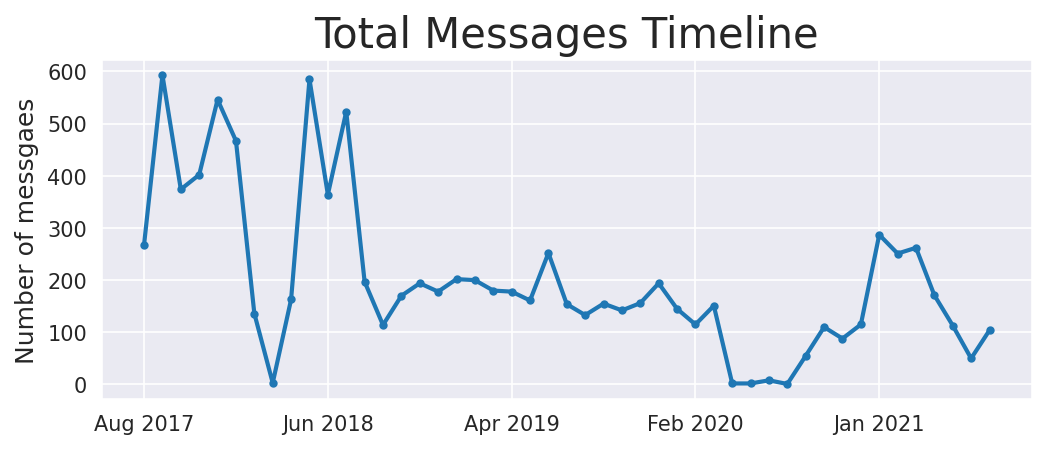

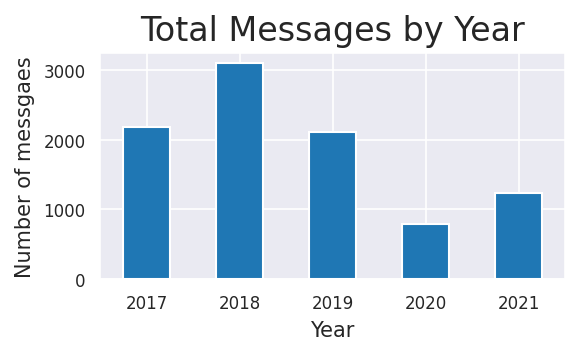

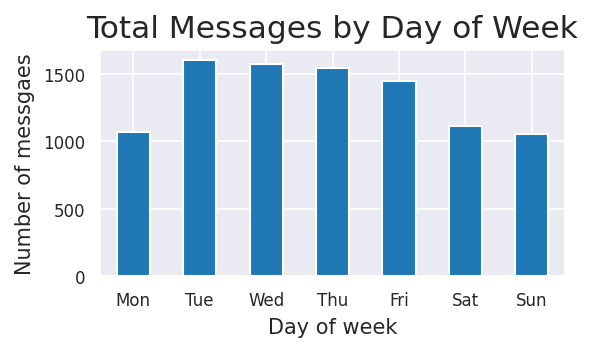

In [ ]:

## plot 1
analysis_df.set_index("month_year")["message"].plot(style='.-', figsize=(8, 3))
plot_chart(title="Total Messages Timeline", title_size=20, ylabel="Number of messgaes", ylabel_size=12)

## plot 2
analysis_df.groupby("year")["message"].sum().plot(kind='bar', figsize=(4, 2))
plot_chart(title="Total Messages by Year", title_size=16, ylabel="Number of messgaes", ylabel_size=10, xlabel="Year", xlabel_size=10, xticks_size=8, yticks_size=8)

## plot 3
date_df.groupby('day_of_week', sort=[True])["message"].count().plot(kind='bar', figsize=(4, 2))
plot_chart(title="Total Messages by Day of Week", title_size=15, ylabel="Number of messgaes", ylabel_size=10, xlabel="Day of week", xlabel_size=10, xticks_size=8, yticks_size=8)

#time

In [ ]:
date_df['time']= pd.to_datetime(date_df['time'])

In [ ]:
date_df


,dates,time,user,message,year,month,day_of_week
0,2017-08-10,2021-08-30 01:25:00,group_notification,"- messages and calls are end-to-end encrypted. no one outside of this chat, not even whatsapp, ...",2017,Aug,Thu
1,2017-08-10,2021-08-30 01:25:00,group_notification,"- adda created group ""creed collection""\n",2017,Aug,Thu
2,2017-08-10,2021-08-30 01:25:00,group_notification,- adda added +91 83413 83062\n,2017,Aug,Thu
3,2017-08-10,2021-08-30 01:25:00,group_notification,- adda changed this group's icon\n,2017,Aug,Thu
4,2017-08-10,2021-08-30 01:25:00,- adda,vijay ping everyday collection here\n,2017,Aug,Thu
...,...,...,...,...,...,...,...
9409,2021-07-27,2021-08-30 11:35:00,- vijay creed gym,26th july sale\n\n1m pt @4000 (2000 due)\n(creed qr code)\n\n1m pt @5000 (creed qr code)\n\n1m ...,2021,Jul,Tue
9410,2021-07-28,2021-08-30 01:08:00,- adda,<media omitted>\n,2021,Jul,Wed
9411,2021-07-28,2021-08-30 11:25:00,- vijay creed gym,27th july sale\n\n3m @6490 (creed qr code)\n,2021,Jul,Wed
9412,2021-07-28,2021-08-30 14:32:00,- adda,paid 150 for printer tech from axis (bro4u)\n,2021,Jul,Wed


In [ ]:
##
def part_of_day(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return 'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [ ]:
time_df = date_df.copy()

# enriching
## 1. hour
time_df["hour"] = time_df["time"].apply(lambda x: x.hour)

## 2. day_of_week
time_df["day_of_week"] = time_df["dates"].apply(lambda x: x.strftime('%a'))
day_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
time_df['day_of_week'] = pd.Categorical(time_df['day_of_week'], day_of_week)

## 3. part_of_day
time_df["part_of_day"] = time_df["hour"].apply(lambda x: part_of_day(x))

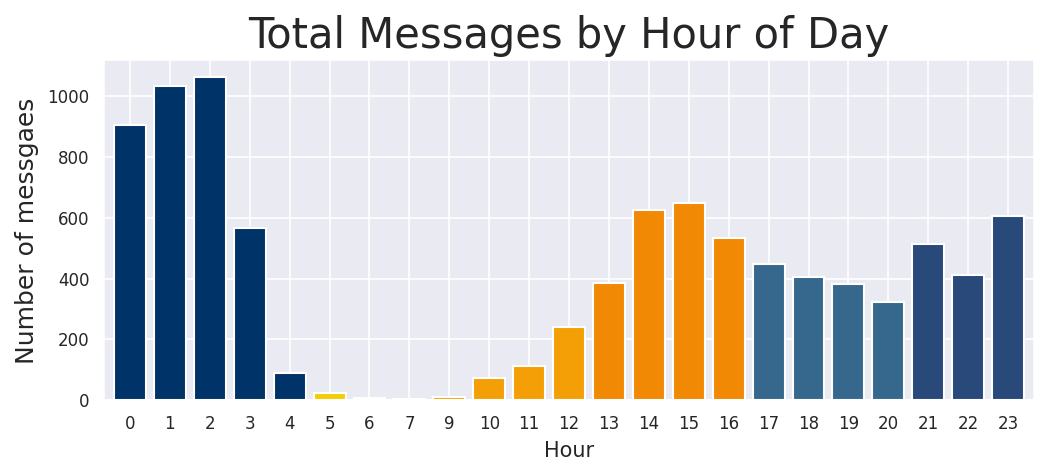

In [ ]:
analysis_1_df = time_df.groupby(["hour", "part_of_day"], as_index=False)["message"].count()
colors = {'Late Night': "#003367",
          'Early Morning':"#F3CD05",
          'Morning': "#F49F05",
          'Noon':"#F18904",
          'Eve': "#36688D",
          'Night':"#28497a"}
analysis_1_df.set_index("hour")["message"].plot(kind="bar", color=[colors[i] for i in analysis_1_df['part_of_day']], width=0.8)
plot_chart(title="Total Messages by Hour of Day",title_size=20, ylabel="Number of messgaes", ylabel_size=12, xlabel="Hour", xlabel_size=10, xticks_size=8, yticks_size=8)

In [ ]:
analysis_2_df = time_df.groupby(['hour', 'day_of_week'], as_index=False)["message"].count()

plt.figure(figsize=(8, 3))
heatmap(
    x=analysis_2_df['hour'],
    y=analysis_2_df['day_of_week'],
    size_scale=250,
    size=analysis_2_df['message'], 
    y_order=day_of_week[::-1],
    color=analysis_2_df['message'], 
    palette=sns.cubehelix_palette(128)
)
plt.title("Number of messages", fontsize=8)

NameError: ignored

<Figure size 1200x450 with 0 Axes>

In [ ]:
print(analysis_2_df[analysis_2_df['message'].isnull()])

    hour day_of_week  message
40     5         Sat      NaN
42     6         Mon      NaN
44     6         Wed      NaN
46     6         Fri      NaN
49     7         Mon      NaN
50     7         Tue      NaN
51     7         Wed      NaN
53     7         Fri      NaN
54     7         Sat      NaN
55     7         Sun      NaN
59     9         Thu      NaN
62     9         Sun      NaN


In [ ]:
author_df = test["user"].value_counts().reset_index()
author_df.rename(columns={"index":"Author", "user":"Number of messages"}, inplace=True)


In [ ]:
author_df

,Author,Number of messages
0,- adda,3276
1,- anand vb,2321
2,- vijay creed gym,1303
3,- vijay@gym,987
4,- vivek,887
5,- shrauan cp10,513
6,- avinash,39
7,group_notification,37
8,- aasma@gym,24
9,- umar@creed,15


In [ ]:
## talkativeness
def talkativeness(percent_message, total_authors):
    mean = 100/total_authors
    threshold = mean*.25
    
    if (percent_message > (mean+threshold)):
        return ("Very talkative")
    elif (percent_message < (mean-threshold)):
        return ("Quiet, untalkative")
    else:
        return ("Moderately talkative")

In [ ]:
author_df["Total %"] = round(author_df["Number of messages"]*100/df.shape[0], 2)
author_df["Talkativeness"] = author_df["Total %"].apply(lambda x: talkativeness(x, test["user"].nunique()))

In [ ]:
print ("Total Authors: {}".format(test["user"].nunique()))

Total Authors: 12


In [ ]:
author_df

,Author,Number of messages,Total %,Talkativeness
0,- adda,3276,34.80,Very talkative
1,- anand vb,2321,24.65,Very talkative
2,- vijay creed gym,1303,13.84,Very talkative
3,- vijay@gym,987,10.48,Very talkative
4,- vivek,887,9.42,Moderately talkative
5,- shrauan cp10,513,5.45,"Quiet, untalkative"
6,- avinash,39,0.41,"Quiet, untalkative"
7,group_notification,37,0.39,"Quiet, untalkative"
8,- aasma@gym,24,0.25,"Quiet, untalkative"
9,- umar@creed,15,0.16,"Quiet, untalkative"


In [ ]:
fig = go.Figure()

labels = author_df["Author"].values
parents = []

fig.add_trace(go.Treemap(
    labels = labels,
    parents = [""]*len(labels),
    values =  author_df["Number of messages"].values,
    textinfo = "label+value+percent parent",
    textfont={'size':14},
    meta={"title.text":"Hi"}
))
fig.update_layout(title_text="Total Messages: "+ str(df.shape[0]), font_size=20, title_x=0.5 )
fig.show()

In [ ]:
t_author_df = test.copy()

# enriching
## 1. year
t_author_df["year"] = t_author_df["dates"].apply(lambda x: x.year)

## 2. month
t_author_df["month"] = t_author_df["dates"].apply(lambda x: x.strftime("%b"))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
t_author_df['month'] = pd.Categorical(t_author_df['month'], months)

In [ ]:
t_author_df

,dates,time,user,message,year,month
0,2017-08-10,2021-08-28 01:25:00,group_notification,"- messages and calls are end-to-end encrypted. no one outside of this chat, not even whatsapp, ...",2017,Aug
1,2017-08-10,2021-08-28 01:25:00,group_notification,"- adda created group ""creed collection""\n",2017,Aug
2,2017-08-10,2021-08-28 01:25:00,group_notification,- adda added +91 83413 83062\n,2017,Aug
3,2017-08-10,2021-08-28 01:25:00,group_notification,- adda changed this group's icon\n,2017,Aug
4,2017-08-10,2021-08-28 01:25:00,- adda,vijay ping everyday collection here\n,2017,Aug
...,...,...,...,...,...,...
9409,2021-07-27,2021-08-28 11:35:00,- vijay creed gym,26th july sale\n\n1m pt @4000 (2000 due)\n(creed qr code)\n\n1m pt @5000 (creed qr code)\n\n1m ...,2021,Jul
9410,2021-07-28,2021-08-28 01:08:00,- adda,<media omitted>\n,2021,Jul
9411,2021-07-28,2021-08-28 11:25:00,- vijay creed gym,27th july sale\n\n3m @6490 (creed qr code)\n,2021,Jul
9412,2021-07-28,2021-08-28 14:32:00,- adda,paid 150 for printer tech from axis (bro4u)\n,2021,Jul


In [ ]:
analysis_1_df = t_author_df.pivot_table(index=["month", "year"], columns=["user"], values=["message"], aggfunc="count", fill_value=0)
analysis_1_df.columns = [col_[1] for col_ in analysis_1_df.columns]
analysis_1_df = analysis_1_df.reset_index().sort_values(["year", "month"])
analysis_1_df["month_year"] = analysis_1_df.apply(lambda x: x["month"] + " " + str(x["year"]), axis=1)
analysis_1_df.drop(["month", "year"], axis=1, inplace=True)
analysis_1_df.set_index('month_year',inplace=True)

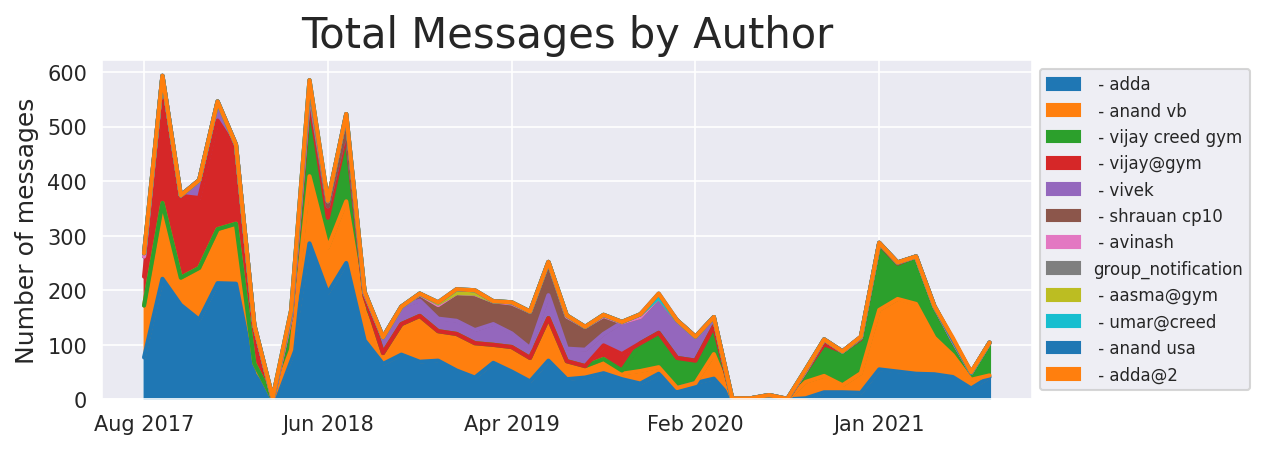

In [ ]:
analysis_1_df[analysis_1_df.sum().sort_values(ascending=False).index].plot(kind='area')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
plot_chart(title="Total Messages by Author", title_size=20, ylabel="Number of messages", ylabel_size=12)

# Messages

In [ ]:
def text_preprocessing(text):
    text = lower_casing(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
#     text = stem_words(text)
    text = lemmatize_words(text)
    #text = remove_emoji(text)
    #text = remove_urls(text)
    #text = remove_html(text)
    #text = expand_contractions(text)
    #text = remove_single_letters(text)
    return text

In [ ]:
## lower casing
def lower_casing(text):
    return str(text).lower()

In [ ]:

## punctuation removal
PUNCT_TO_REMOVE = '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~.' #string.punctuation
def remove_punctuation(text):
    """function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [ ]:
## stopword removal
import nltk
nltk.download('stopwords')


from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
## appending hinglish stopwords

with open('/content/hinglish.txt') as f:
  hinglish_stopwords = f.read().split('\n')
#hinglish = open("hinglish", encoding="utf-8")
#hinglish_stopwords = hinglish.read().split('\n')

STOPWORDS = set(stopwords.words('english'))
STOPWORDS.update(hinglish_stopwords)

def remove_stopwords(text):
    """function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
## Lemmatization: Remove suffix and check whether it is present in dictionary
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(str(text).split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
message_df = test.copy()
#import nltk
nltk.download('averaged_perceptron_tagger')
## Removing: image omiited, document omitted, video omitted, contact card omiited
message_df = message_df[~message_df["message"].str.contains('omitted')]
## Removing: "This message was deleted", "You deleted this message"
message_df = message_df[~(message_df["message"].str.contains("This message was deleted.") | message_df["message"].str.contains("You deleted this message."))]

message_df["processed_message"] = message_df["message"].apply(lambda x: text_preprocessing(x))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Overall

In [ ]:
def percent_helper(percent):
    percent = math.floor(percent*100)/100
    
    if (percent>0.01):
        ans = findnum(str(percent))
        return "{} out of {} messages".format(int(percent*ans), int(1*ans))
    else:
        return "<1 out of 100 messages" 

In [ ]:
def gcd(a, b): 
  
    if (b == 0): 
        return a 
    return gcd(b, a%b)

In [ ]:

def findnum(str): 
      
    # Find size of string representing a 
    # floating point number. 
    n = len(str) 
    # Below is used to find denominator in 
    # fraction form. 
    count_after_dot = 0
   
    # Used to find value of count_after_dot 
    dot_seen = 0
   
    # To find numerator in fraction form of 
    # given number. For example, for 30.25, 
    # numerator would be 3025. 
    num = 0
    for i in range(n): 
        if (str[i] != '.'): 
            num = num*10 + int(str[i]) 
            if (dot_seen == 1): 
                count_after_dot += 1
        else: 
            dot_seen = 1
   
    # If there was no dot, then number 
    # is already a natural. 
    if (dot_seen == 0): 
       return 1
   
    # Find denominator in fraction form. For example, 
    # for 30.25, denominator is 100 
    dem = int(math.pow(10, count_after_dot)) 
   
    # Result is denominator divided by 
    # GCD-of-numerator-and-denominator. For example, for 
    # 30.25, result is 100 / GCD(3025,100) = 100/25 = 4 
    return (dem / gcd(num, dem)) 

In [ ]:
words_lst = (''.join(message_df["processed_message"].values)).split(' ')
analysis_1_df = pd.DataFrame.from_dict(Counter(words_lst), orient='index', columns=["count"]).reset_index().rename(columns={'index': 'word'})
analysis_1_df.sort_values('count', ascending=False, inplace=True, ignore_index=True)
analysis_1_df[""] = analysis_1_df["count"].apply(lambda x: percent_helper(x/df.shape[0]))

display(analysis_1_df.head(20))

,word,count,
0,card,671,7 out of 100 messages
1,total,643,3 out of 50 messages
2,cash,492,1 out of 20 messages
3,pay,475,1 out of 20 messages
4,1,387,1 out of 25 messages
5,sale,371,3 out of 100 messages
6,month,328,3 out of 100 messages
7,enroll,302,3 out of 100 messages
8,counter,298,3 out of 100 messages
9,axis,252,1 out of 50 messages


In [ ]:
## wordcloud
## https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
def wordcloud_(content, title="", generate_from_frequencies=False, mask=None, background_color='black'):
    wordcloud = WordCloud(background_color=background_color,
#                           stopwords = set(STOPWORDS),
                          max_words = 100,
                          max_font_size = 200,
#                           random_state = 4,
                          height=400, width=800,
                          prefer_horizontal=0.9,
                          relative_scaling=0.6,
                          mask=mask
                     )
    
    if (generate_from_frequencies):
        wordcloud.generate_from_frequencies(frequencies=content)
    else:
        wordcloud.generate(content)

    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud)
    plt.title(title, fontdict={'size': 40})
    plt.axis('off');
    plt.tight_layout()

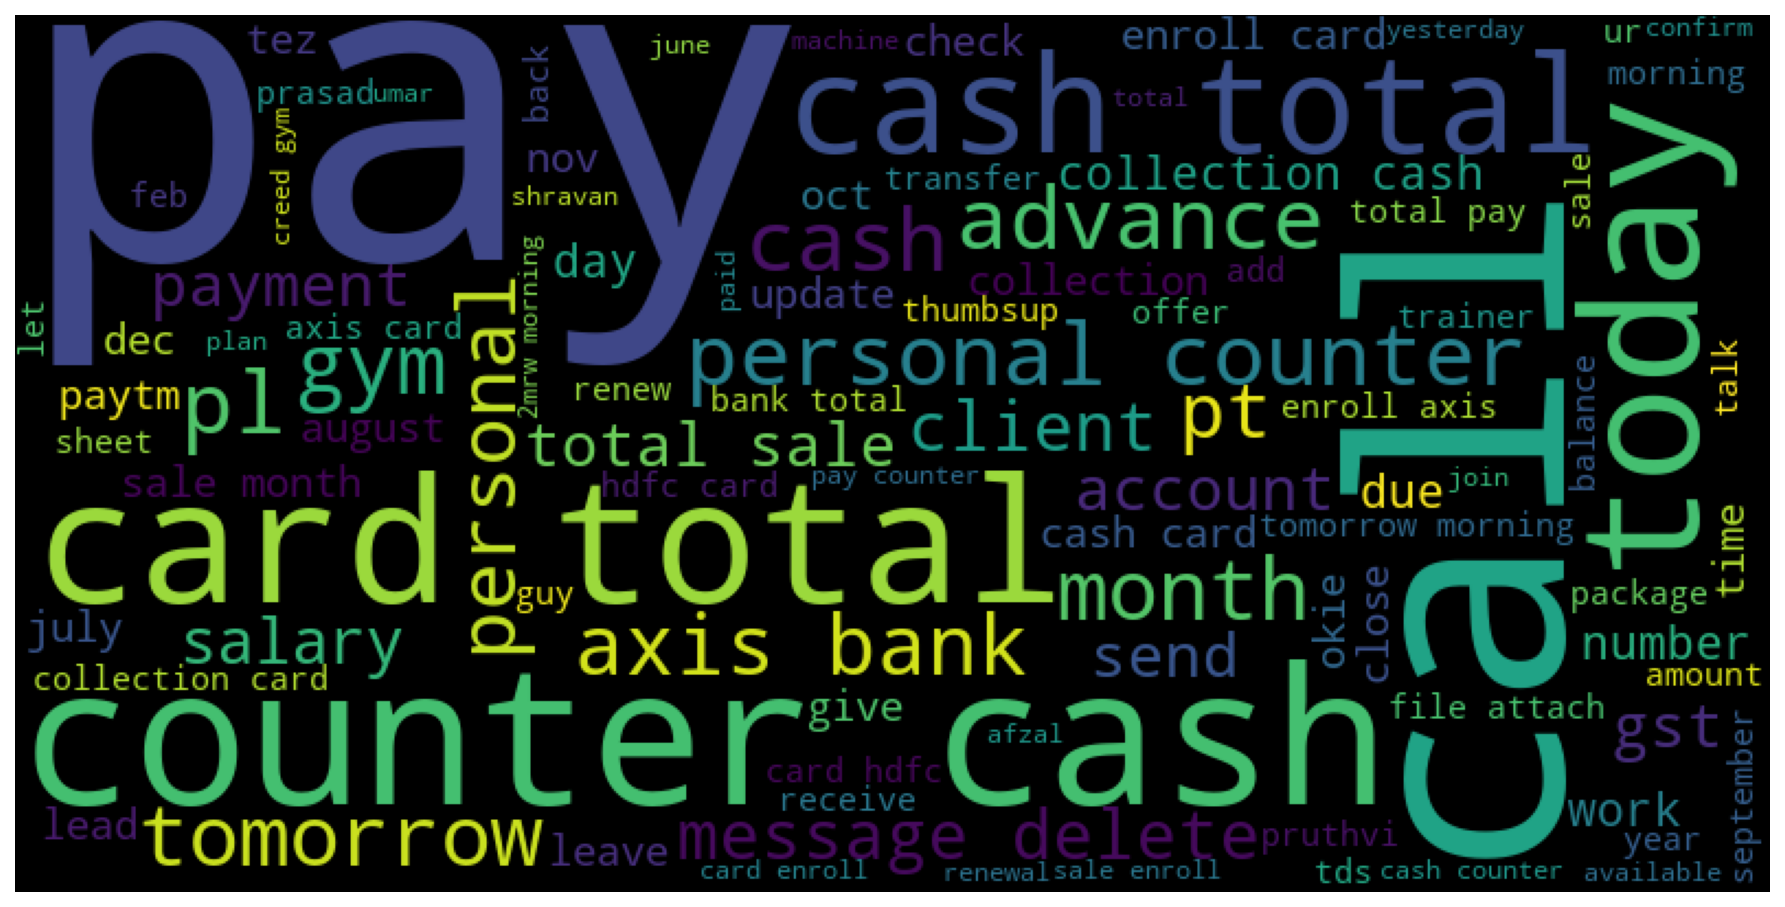

In [ ]:
text = ' '.join(message_df["processed_message"].values)
wordcloud_(text)

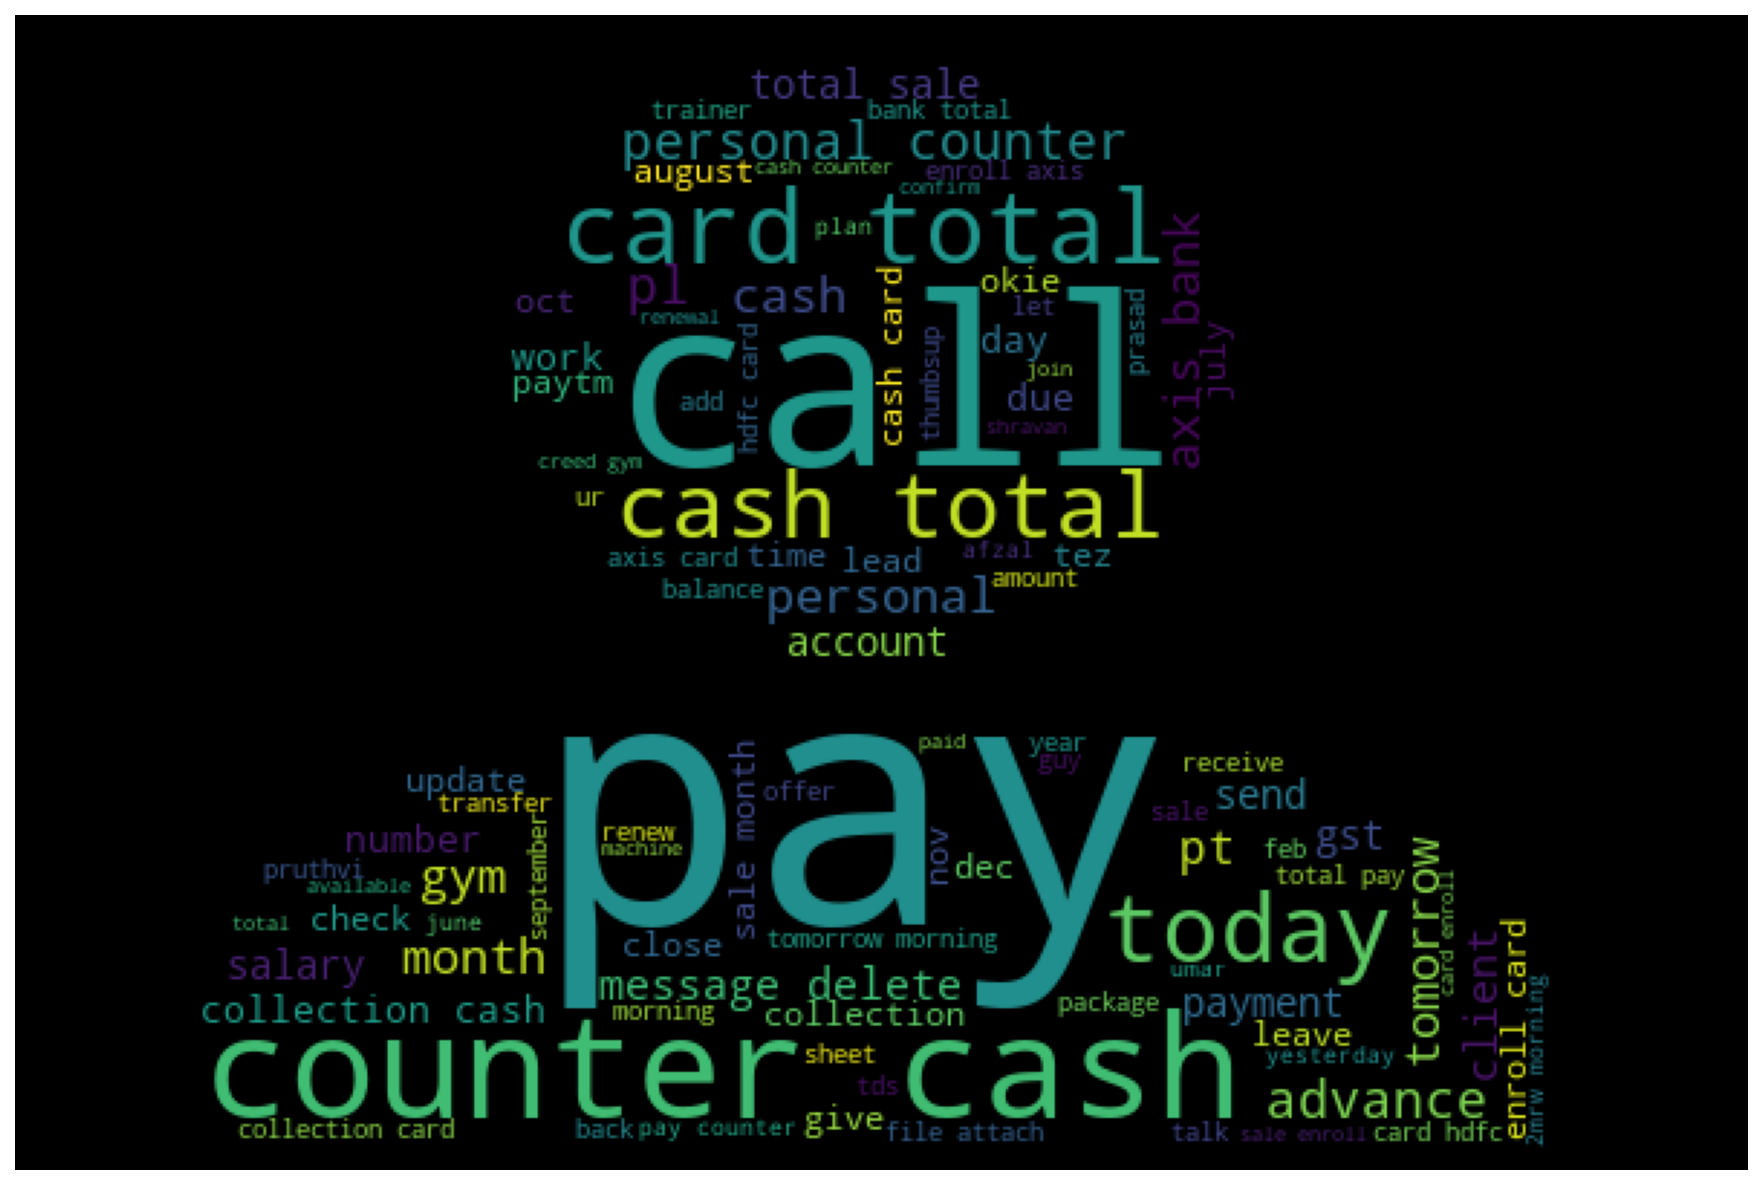

In [ ]:
user_img = Image.open("user.png")
mask = np.array(user_img.resize((600, 400)))
wordcloud_(text, mask=mask, background_color='black')